In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import poisson

In [3]:
turis = [0, 1, 2, 3, 4]
#ini jumlah turis yang mungkin datang (4 mewakili 4+)
lam = 2 #2 orang setiap 2 menit datang ke ruang tunggu
bobot = poisson.pmf(turis, lam)
bobot[-1]=1-sum(bobot[:-1])
bobot

array([0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.14287654])

In [12]:
#Matriks Markov (Probabilitas Transisi)
P=np.eye(5)
P[0,:] = bobot
P[1,:] = bobot
P[2,:] = bobot
P[3,1:] = bobot[:-1]
P[3,-1:] = sum(bobot[-2:])
P[4,:]=bobot
P

array([[0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.14287654],
       [0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.14287654],
       [0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.14287654],
       [0.        , 0.13533528, 0.27067057, 0.27067057, 0.32332358],
       [0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.14287654]])

In [13]:
S=np.eye(5)
S

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [14]:
P4=[]
S = np.eye(5)
for i in range(10):
  S = np.dot(S,P)
  P4.append(S[-1,-1])
S

array([[0.10849259, 0.24382787, 0.27067057, 0.19834217, 0.1786668 ],
       [0.10849259, 0.24382787, 0.27067057, 0.19834217, 0.1786668 ],
       [0.10849259, 0.24382787, 0.27067057, 0.19834217, 0.1786668 ],
       [0.10849259, 0.24382787, 0.27067057, 0.19834217, 0.1786668 ],
       [0.10849259, 0.24382787, 0.27067057, 0.19834217, 0.1786668 ]])

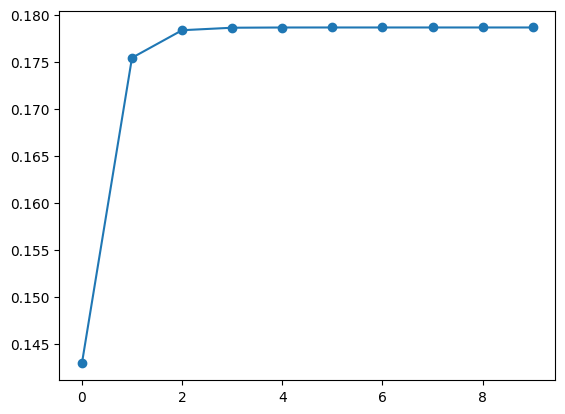

In [15]:
plt.plot(P4,'-o')